Animation saved as ideal_gas_simulation.gif


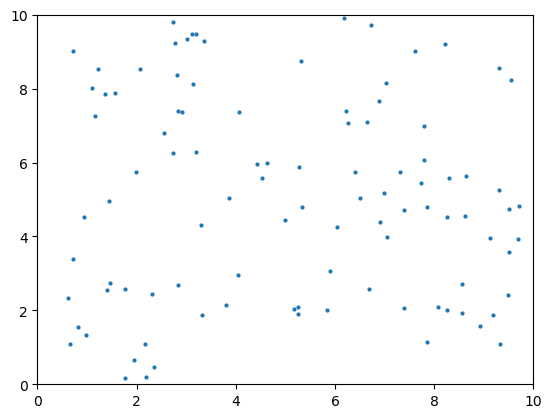

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Simulation parameters
n_particles = 100  # Number of particles
box_size = 10.0    # Size of the box (length of one side)
particle_radius = 0.2  # Radius of each particle
max_velocity = 2.0  # Maximum initial velocity
time_step = 0.01  # Time step for simulation
n_steps = 1000  # Number of steps to simulate

# Initialize particle positions and velocities
np.random.seed(42)  # For reproducibility
positions = np.random.uniform(particle_radius, box_size - particle_radius, (n_particles, 2))
velocities = np.random.uniform(-max_velocity, max_velocity, (n_particles, 2))

# Function to handle collisions with walls
def handle_wall_collisions(positions, velocities, box_size):
    for i in range(n_particles):
        for dim in range(2):  # Check x and y dimensions
            if positions[i, dim] - particle_radius < 0 or positions[i, dim] + particle_radius > box_size:
                velocities[i, dim] *= -1
    return velocities

# Function to handle collisions between particles
def handle_particle_collisions(positions, velocities):
    for i in range(n_particles):
        for j in range(i + 1, n_particles):
            delta_pos = positions[i] - positions[j]
            distance = np.linalg.norm(delta_pos)
            if distance < 2 * particle_radius:  # Collision condition
                # Compute the velocity change
                delta_v = velocities[i] - velocities[j]
                delta_pos_unit = delta_pos / distance
                velocities[i] -= np.dot(delta_v, delta_pos_unit) * delta_pos_unit
                velocities[j] += np.dot(delta_v, delta_pos_unit) * delta_pos_unit
    return velocities

# Initialize the figure for animation
fig, ax = plt.subplots()
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)
particles = plt.scatter(positions[:, 0], positions[:, 1], s=100 * particle_radius**2)

# Update function for animation
def update(frame):
    global positions, velocities
    positions += velocities * time_step
    velocities = handle_wall_collisions(positions, velocities, box_size)
    velocities = handle_particle_collisions(positions, velocities)
    particles.set_offsets(positions)
    return particles,

# Create the animation
ani = FuncAnimation(fig, update, frames=n_steps, interval=20, blit=True)

# Save the animation to a GIF
output_file = "ideal_gas_simulation.gif"
ani.save(output_file, writer=PillowWriter(fps=30))
print(f"Animation saved as {output_file}")
